<a href="https://colab.research.google.com/github/mukeshbanoth/Arduino-FlightController/blob/main/AI_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Logistic Regression Accuracy: 92.11%
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


K-Nearest Neighbors Accuracy: 92.11%
[[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]
              precision    recall  f1-score   support

  

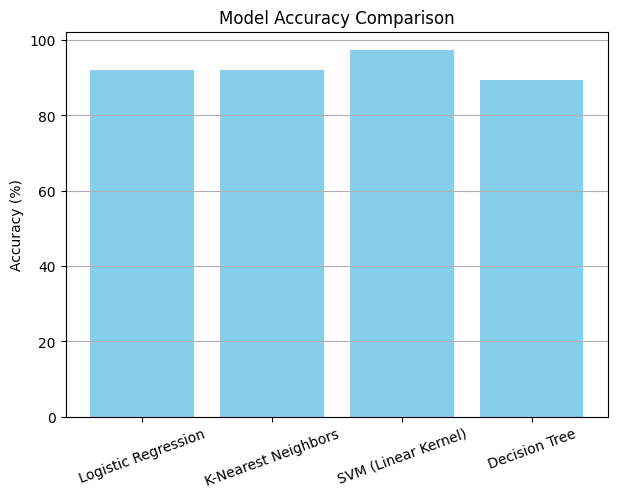

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------------------------------------
# 1. Load Iris Dataset from Public URL (same as Kaggle data)
# ---------------------------------------------------------
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully")
print(df.head())

# ---------------------------------------------------------
# 2. Preprocessing: convert species into numerical labels
# ---------------------------------------------------------
df['species_code'] = df['species'].astype('category').cat.codes
y = df['species_code']
X = df.drop(columns=['species', 'species_code'])

# ---------------------------------------------------------
# 3. Train-test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 4. Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 5. Define Models
# ---------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

# ---------------------------------------------------------
# 6. Train & Evaluate Models
# ---------------------------------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results[name] = acc

    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 7. Best Model
# ---------------------------------------------------------
best_model = max(results, key=results.get)
print("\nBest Model:", best_model)
print(f"Accuracy: {results[best_model]*100:.2f}%")

# ---------------------------------------------------------
# 8. Plot Accuracy Comparison
# ---------------------------------------------------------
plt.figure(figsize=(7,5))
plt.bar(results.keys(), [v*100 for v in results.values()], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()
